In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np 

In [ ]:
filePath = 'C2T1_Train.csv'
 
rawDF=pd.read_csv(filePath)

rawDF.info()

Weight Column has almost all '?' values renderring it useless for the model to train on.

In [7]:
rawDF.drop('weight', axis=1, inplace=True)

In [ ]:
rawDF.info()

In [ ]:
rawDF.isnull().sum()

Drop max_glu_serum & A1Cresult as it is mostly NuLL values.

In [ ]:
rawDF.drop('max_glu_serum', axis=1, inplace=True)


In [15]:
rawDF.drop('A1Cresult', axis=1, inplace=True)

In [ ]:
rawDF.describe(include='all')

In [ ]:

df = pd.read_csv('C2T1_Train.csv')

# Replace '?' with NaN
df = df.replace('?', pd.NA)

# Define columns again, ensuring we're working with the correct data types
num_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in ['encounter_id2', 'patient_nbr2']]
cat_columns = [col for col in df.columns if df[col].dtype == 'object']

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent', add_indicator=True)

df[num_columns] = num_imputer.fit_transform(df[num_columns])
# The categorical imputation needs to be handled differently to avoid the error.
# Manually impute missing values for categorical columns
for col in cat_columns:
    # If a column is categorical, fill missing values with the mode (most frequent value)
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

# Proceed with OneHotEncoder for categorical variables
onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
encoded_features = onehot_encoder.fit_transform(df[cat_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(cat_columns))
encoded_features_df.index = df.index  # Ensure alignment of indices

# Remove original categorical columns and merge the encoded features
df = df.drop(cat_columns, axis=1)
df = pd.concat([df, encoded_features_df], axis=1)

# Standardize numerical features (excluding identifiers)
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

# Attempt to display the first few rows of the corrected DataFrame
df.head()

df.to_csv('cleandata.csv', index=False)

In [8]:
df = pd.read_csv('C2T1_Train.csv')

import pandas as pd

# List of specific columns to process
columns_to_process = [
    "metformin", "repaglinide", "nateglinide",
    "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide",
    "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol",
    "troglitazone", "tolazamide", "examide", "citoglipton",
    "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone",
    "metformin-rosiglitazone", "metformin-pioglitazone", "change", 'gender'
]


race_columns = ["race"]

# Define a function to apply the conversion
def convert_value(value):
    if value is None or pd.isnull(value):
        return value
    value_lower = value.lower()
    return 0 if value_lower in ['none', 'no', 'female'] else 1

# Apply the function to the specified columns
for column in columns_to_process:
    if column in df.columns:  # Check if the column exists in the DataFrame
        df[column] = df[column].apply(convert_value)





df.drop('weight', axis=1, inplace=True)
df.drop('max_glu_serum', axis=1, inplace=True)
df.drop('A1Cresult', axis=1, inplace=True)

# After processing, you might want to save the processed DataFrame or use it for further analysis
df.to_csv('path_to_your_processed_csv_file.csv', index=False)

In [15]:
df = pd.read_csv('path_to_your_processed_csv_file.csv')
race_value_counts = df['race'].value_counts()
print(race_value_counts)


# Define your race mapping
race_mapping = {
    'Caucasian': 1,
    'AfricanAmerican': 2,
    'Hispanic': 3,
    'Other': 4,
    'Asian': 5,
    '?': np.nan  # Use NaN for unknown values
}

# Map the race values in your DataFrame
df['race'] = df['race'].map(race_mapping)


# Verify the changes
race_value_counts2= df['race'].value_counts()
print(race_value_counts2)

df.to_csv('path_to_your_processed_csv_file.csv', index=False)


race
Caucasian          67515
AfricanAmerican    17267
?                   2207
Hispanic            1834
Other               1358
Asian                585
Name: count, dtype: int64
race
1.0    67515
2.0    17267
3.0     1834
4.0     1358
5.0      585
Name: count, dtype: int64


In [18]:
df = pd.read_csv('path_to_your_processed_csv_file.csv')
# Set pandas to display all rows when printing the value counts
pd.set_option('display.max_rows', None)

# Get the value counts of the 'medical_specialty' column
medical_specialty_value_counts = df['medical_specialty'].value_counts()

# Print all the value counts
print(medical_specialty_value_counts)
medical_specialty_value_counts.to_csv('medical_specialty_value_counts.csv', index=True)

medical_specialty
?                                       43674
InternalMedicine                        13657
Family/GeneralPractice                   6906
Emergency/Trauma                         6398
Cardiology                               4939
Surgery-General                          2778
Nephrology                               1457
Orthopedics                              1234
Orthopedics-Reconstructive               1137
Radiologist                               966
Pulmonology                               814
Psychiatry                                774
Urology                                   627
Surgery-Cardiovascular/Thoracic           623
ObstetricsandGynecology                   619
Gastroenterology                          484
Surgery-Neuro                             446
Surgery-Vascular                          416
PhysicalMedicineandRehabilitation         383
Oncology                                  314
Pediatrics                                239
Hematology/Oncol

In [22]:
df = pd.read_csv('path_to_your_processed_csv_file.csv')

df.drop('medical_specialty', axis=1, inplace=True)

df.to_csv('path_to_your_processed_csv_file.csv', index=False)

In [24]:
def convert_age(age_range):
    lower, upper = age_range[1:-1].split('-')
    midpoint = (int(lower) + int(upper)) // 2
    return midpoint

# Load your DataFrame
df = pd.read_csv('path_to_your_processed_csv_file.csv')

# Apply the conversion function to the 'age' column
df['age'] = df['age'].apply(convert_age)

# Display the first few rows to ensure the conversion worked as expected
print(df.head())

# Save the processed DataFrame back to a new CSV file
df.to_csv('path_to_your_processed_csv_file.csv', index=False)

   encounter_id2  patient_nbr2  race  gender  age  admission_type_id   
0           5283      48330653   1.0       0   85                  2  \
1           8499      63555809   1.0       0   95                  3   
2           9441      42519137   1.0       1   45                  1   
3          20997      89868902   2.0       0   45                  1   
4          28515      82637321   1.0       1   55                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code   
0                         1                    4                13          ?  \
1                         3                    4                12          ?   
2                         1                    7                 1          ?   
3                         1                    7                 9          ?   
4                         1                    2                 3          ?   

   ...  citoglipton  insulin  glyburide-metformin  glipizide-metformin   
0  ...

In [26]:
df = pd.read_csv('path_to_your_processed_csv_file.csv')
scaler = StandardScaler()
num_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in ['encounter_id2', 'patient_nbr2']]
df[num_columns] = scaler.fit_transform(df[num_columns])
df.to_csv('path_to_your_processed_csv_file1.csv', index=False)

In [27]:
import pandas as pd
df = pd.read_csv('path_to_your_processed_csv_file1.csv')


# Convert 'readmitted' values: 0 for 'NO', 1 for any other value
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# Save the modified DataFrame back to a CSV if needed
df.to_csv('path_to_your_processed_csv_file1.csv', index=False)

# Verify the changes
print(df['readmitted'].value_counts())

readmitted
0    49361
1    41405
Name: count, dtype: int64


In [4]:
df = pd.read_csv('path_to_your_processed_csv_file1.csv')

df.drop('payer_code', axis=1, inplace=True)

df.to_csv('path_to_your_processed_csv_file1.csv', index=False)

/var/folders/ym/0_vtz1kx4_5fl0q9222rj5n40000gn/T/ipykernel_36926/3717014807.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('path_to_your_processed_csv_file1.csv')


In [31]:
import pandas as pd

# Load your DataFrame from the CSV file
df = pd.read_csv('path_to_your_processed_csv_file1.csv')

# Replace all NaN values with 0s
df.fillna(0, inplace=True)

# Verify the changes by displaying the first few rows of the DataFrame
print(df.head())

# Save the modified DataFrame back to a CSV file
df.to_csv('path_to_your_processed_csv_file1.csv', index=False)

   encounter_id2  patient_nbr2      race    gender       age   
0           5283      48330653 -0.473075 -0.928409  1.195421  \
1           8499      63555809 -0.473075 -0.928409  1.820909   
2           9441      42519137 -0.473075  1.077112 -1.306535   
3          20997      89868902  1.058792 -0.928409 -1.306535   
4          28515      82637321 -0.473075  1.077112 -0.681046   

   admission_type_id  discharge_disposition_id  admission_source_id   
0          -0.017468                 -0.517817            -0.445388  \
1           0.670080                 -0.144628            -0.445388   
2          -0.705015                 -0.517817             0.277931   
3          -0.705015                 -0.517817             0.277931   
4          -0.017468                 -0.517817            -0.927601   

   time_in_hospital payer_code  ...  citoglipton  insulin   
0          2.867647          ?  ...          0.0   Steady  \
1          2.533853          ?  ...          0.0   Steady   
2    

In [2]:
# Load your DataFrame from the CSV file
df = pd.read_csv('path_to_your_processed_csv_file1.csv')
# Replace all NaN values with 0s
df.replace('?', 0, inplace=True)
# Save the modified DataFrame back to a CSV file
df.to_csv('path_to_your_processed_csv_file1.csv', index=False)


In [7]:
df = pd.read_csv('path_to_your_processed_csv_file1.csv')

# Define the mapping for the 'insulin' column
insulin_mapping = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': 3
}

# Apply the mapping to the 'insulin' column
df['insulin'] = df['insulin'].map(insulin_mapping)

# Check the transformed 'insulin' column to ensure the mapping is applied correctly
print(df['insulin'].value_counts())

df.to_csv('path_to_your_processed_csv_file1.csv', index=False)


insulin
0    42793
1    27876
3    10487
2     9610
Name: count, dtype: int64


In [9]:
df = pd.read_csv('path_to_your_processed_csv_file1.csv')

# Define the mapping for the 'insulin' column
insulin_mapping = {
    'No': 0,
    'Yes': 1,

}

# Apply the mapping to the 'insulin' column
df['diabetesMed'] = df['diabetesMed'].map(insulin_mapping)

# Check the transformed 'insulin' column to ensure the mapping is applied correctly
print(df['diabetesMed'].value_counts())

df.to_csv('path_to_your_processed_csv_file1.csv', index=False)


diabetesMed
1    69573
0    21193
Name: count, dtype: int64


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your preprocessed data
df = pd.read_csv('path_to_your_processed_csv_file1.csv')

# Specified attributes to include as features
features = [
    "race", "gender", "age", "admission_type_id", "discharge_disposition_id",
    "admission_source_id", "time_in_hospital", "payer_code", "num_lab_procedures",
    "num_procedures", "num_medications", "number_outpatient", "number_emergency",
    "number_inpatient", "diag_1", "diag_2", "diag_3", "number_diagnoses",
    "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",
    "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone",
    "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide",
    "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin",
    "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone",
    "change", "diabetesMed"
]

X = df[features]
y = df['readmitted']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
# Numerical transformer with StandardScaler and optional PCA
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))  # Keeps 95% of variance
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
    ])

# SVM model pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear'))
])

# Training the SVM model
svm_pipeline.fit(X_train, y_train)

# Making predictions
y_pred = svm_pipeline.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Model Evaluation:
Accuracy: 63.52%
F1 Score: 0.57
Confusion Matrix:
[[7179 2677]
 [3946 4352]]

Deep Learning Model Evaluation:
Accuracy: 53.63%
F1 Score: 0.33
Confusion Matrix:
[[7701 2155]
 [6263 2035]]


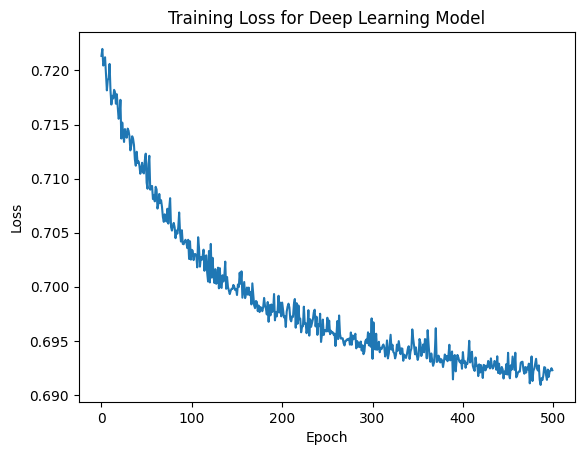

AdaBoost Model Evaluation:
Accuracy: 64.46%
F1 Score: 0.56
Confusion Matrix:
[[7659 2197]
 [4255 4043]]


In [10]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.svm import SVC

df = pd.read_csv('path_to_your_processed_csv_file1.csv')

# Specified attributes to include as features
features = [
    "race", "gender", "age", "admission_type_id", "discharge_disposition_id",
    "admission_source_id", "time_in_hospital", "num_lab_procedures",
    "num_procedures", "num_medications", "number_outpatient", "number_emergency",
    "number_inpatient", "number_diagnoses",
    "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",
    "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone",
    "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide",
    "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin",
    "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone",
    "change", "diabetesMed"
]

X = df[features]
y = df['readmitted']  # Target variable

# Convert to NumPy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)  # Training with NumPy arrays
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest Model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print(f"F1 Score: {rf_f1:.2f}")
print("Confusion Matrix:")
print(rf_conf_matrix)

class EnhancedNNModel(nn.Module):
    def __init__(self, input_dim):
        super(EnhancedNNModel, self).__init__()
        # Increasing the depth and complexity of the network
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.batchnorm1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.batchnorm2 = nn.BatchNorm1d(64)

        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)
        
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.batchnorm1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.batchnorm2(x)

        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        x = self.sigmoid(x)
        return x


input_dim = X_train_tensor.shape[1]
dl_model = EnhancedNNModel(input_dim)

# Define loss function and optimizer for deep learning model
criterion = nn.BCELoss()
optimizer = optim.SGD(dl_model.parameters(), lr=0.01)

# Training loop for deep learning model
num_epochs = 500
dl_losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = dl_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()
    dl_losses.append(loss.item())

# Predictions for deep learning model
with torch.no_grad():
    dl_y_pred = dl_model(X_test_tensor)
    dl_y_pred = (dl_y_pred >= 0.5).float()

# Convert tensors back to NumPy arrays for evaluation
dl_y_pred = dl_y_pred.numpy()
dl_y_test = y_test_tensor.numpy()

# Evaluate Deep Learning Model
dl_accuracy = accuracy_score(dl_y_test, dl_y_pred)
dl_f1 = f1_score(dl_y_test, dl_y_pred)
dl_conf_matrix = confusion_matrix(dl_y_test, dl_y_pred)

print("\nDeep Learning Model Evaluation:")
print(f"Accuracy: {dl_accuracy * 100:.2f}%")
print(f"F1 Score: {dl_f1:.2f}")
print("Confusion Matrix:")
print(dl_conf_matrix)

# Visualize the loss curve for deep learning model
plt.plot(dl_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss for Deep Learning Model")
plt.show()


# AdaBoost Model
ab_model = AdaBoostClassifier(n_estimators=500, random_state=42)
ab_model.fit(X_train, y_train)  # Training
ab_y_pred = ab_model.predict(X_test)

# Evaluate AdaBoost Model
ab_accuracy = accuracy_score(y_test, ab_y_pred)
ab_f1 = f1_score(y_test, ab_y_pred)
ab_conf_matrix = confusion_matrix(y_test, ab_y_pred)

print("AdaBoost Model Evaluation:")
print(f"Accuracy: {ab_accuracy * 100:.2f}%")
print(f"F1 Score: {ab_f1:.2f}")
print("Confusion Matrix:")
print(ab_conf_matrix)
# Save the models
#joblib.dump(rf_model, '/Users/amirrezarafati/Downloads/CapsotneModel/RB/Repo/Capstone/Amir/Data/RandomForestModel.pkl')
#torch.save(dl_model.state_dict(), '/Users/amirrezarafati/Downloads/CapsotneModel/RB/Repo/Capstone/Amir/Data/DeepLearningModel.pth')



def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)

    plt.figure(figsize=(10,7))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Other imports and your existing code remains the same


# Support Vector Machine (SVM) Model
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

# Evaluate SVM Model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

print("\nSVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print(f"F1 Score: ", svm_f1)
print("Confusion Matrix:", svm_conf_matrix)


joblib.dump(svm_model, '/Users/amirrezarafati/Downloads/CapsotneModel/RB/Repo/Capstone/Amir/Data/PredictionModelSVM.pkl')


test_df = pd.read_csv('path_to_your_unlabeled_test_csv.csv')

# Preprocess the test data (ensure this matches the preprocessing done on the training data)
# This includes filling NaNs, encoding categorical variables, and scaling numerical features
# Since your preprocessing steps might be complex, ensure you use the same transformer or pipeline

# For demonstration, assume the preprocessing pipeline is stored in a variable named 'preprocessor'
X_test_unlabeled = preprocessor.transform(test_df[features])

# Predict using the SVM model
y_pred_test = svm_model.predict(X_test_unlabeled)

# Add the predictions to the test DataFrame
test_df['predicted_readmission'] = y_pred_test

# Save the DataFrame with predictions to a new CSV file
test_df.to_csv('path_to_your_test_with_predictions.csv', index=False)

# Plot confusion matrix for SVM model
plot_confusion_matrix(y_test, svm_y_pred, classes=[0, 1], model_name='SVM')
# Example: Plot confusion matrix for Random Forest model
plot_confusion_matrix(y_test, rf_y_pred, classes=[0, 1], model_name='Random Forest')

# Example: Plot confusion matrix for AdaBoost model
plot_confusion_matrix(y_test, ab_y_pred, classes=[0, 1], model_name='AdaBoost')

